<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging <br/> Présentation des résultats algorithmique</h1>

In [1]:
#chargement des corpus en mémoire

import dataAnalysis as da
import matplotlib.pyplot as plt
import numpy as np
da.init()

Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
Done!


# Statistique des corpus

In [ ]:
#itère sur chacun des corpus
def iterateCorpus(f, printing = True):
    for nameCorpus, corpus in da.listeCorpus.items():
        if printing:
            print("corpus : ", nameCorpus)
        for typeDS, dataset in corpus.getDataset().items():
            if printing:
                print("ensemble ", typeDS)
            f(dataset, nameCorpus, typeDS)

# met à jour les données statistiques
def updateStat(dataset, nm, tds):
    dataset.updateStat()

# affiche les statistiques basique


def printBasicStat(dataset, nm, tds):
    #baseStat.append((nm + " " + tds, len(dataset.data), dataset.nbWord, dataset.nbUniqueWords))
    print("   nombre de phrase : ", len(dataset.data))
    print("   nombre de mot : ", dataset.nbWord)
    print("   nombre de mot unique : ", dataset.nbUniqueWords)


    

# affiche les 10 mots / labels les plus fréquents de chaque corpus
def printMostFrequent(dataset, nm, tds):
    print()
    print("10 mots les plus fréquents : ")
    print(dataset.mostFrequentWord)
    print()
    print()
    print("labels les plus fréquents : ")
    print(dataset.mostFrequentLabel)
    print()
    
# affiche les 10 mots les plus ambigu de chaque corpus
def printMostAmbiguousWord(dataset, nm, tds):
    ambiguousDict, ambiguousWord = dataset.ambiguousWord()
    
    def sortSecond(val):
        return len(val[1])
    
    ambiguousWord.sort(key = sortSecond, reverse = True)
    
    print()
    print("5 mots les plus ambigu : ", ambiguousWord[:5])
    print()
    
iterateCorpus(updateStat, False)

In [ ]:
#baseStat = []

iterateCorpus(printBasicStat)

from tabulate import tabulate

#print(tabulate(baseStat, tablefmt="latex", floatfmt=".2f"))

In [ ]:
iterateCorpus(printMostFrequent)

In [ ]:
#mot les plus ambigu de chaque corpus

iterateCorpus(printMostAmbiguousWord)

## Out Of Vocabulary Word

In [ ]:
# Calcul des Out of Vocabulary Words
oovLatex = []


footTest = da.listeCorpus['foot'].testDataSet
natdisTest = da.listeCorpus['natdis'].testDataSet


for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        oovResult = corpus.computeCorpusOOV()
        oovResultFoot = corpus.computeOOV(footTest)
        oovResultnatdis = corpus.computeOOV(natdisTest)
        print(nameCorpus, " : ")
        print("     Pourcentage de l'oov entre train et test : ", oovResult[0])
        print("     Pourcentage de l'oov entre train et dev : ", oovResult[1])
        print("     Pourcentage de l'oov entre train et footTest : ", oovResultFoot)
        print("     Pourcentage de l'oov entre train et natdisTest : ", oovResultnatdis)
        latexRows = (nameCorpus, oovResult[0], oovResult[1], oovResultFoot, oovResultnatdis)
        oovLatex.append(latexRows)

print(tabulate(oovLatex, tablefmt="latex"))

## Divergence de Kullback-Leibler

In [ ]:
# Calcul des divergence de KullBack-Leibler

latexDKL = []

for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        print(nameCorpus + " : ")
        DKLResult = corpus.computeCorpusKLDivergence()
        DKLFootresult = corpus.computeKLDivergence(footTest)
        DKLnatdisResult = corpus.computeKLDivergence(natdisTest)
        print("     Dkl(test||train) = ", DKLResult)
        print("     Dkl(footTest||train) = ", DKLFootresult)
        print("     Dkl(natdisTest||train) = ", DKLnatdisResult)
        latexDKL.append( (nameCorpus, DKLResult, DKLFootresult, DKLnatdisResult) )
        
        
print(tabulate(latexDKL, tablefmt="latex"))

# Perplexity

In [ ]:
latexPerplexity = []

print("                         train,                   test,              dev")
for nameCorpus, corpus in da.listeCorpus.items():
    print(nameCorpus, " : ")
    pp_res = corpus.computePerplexityCorpus()
    print("     perplexity : ", pp_res)
    latexRow = []
    latexRow.append(nameCorpus)
    if type(pp_res) == tuple:
        for i in pp_res:
            latexRow.append(i)
    else:
        latexRow.append(pp_res)
    latexPerplexity.append( latexRow )
    
print(tabulate(latexPerplexity, tablefmt="latex"))

# Training Model
## Decision Tree Classifier

In [2]:
import modelAnalysis as ma

Beginning of the model analysis between  partut  train and  partut  test
split_criterion :  gini  / gen_test :  median
      training time :  0.08146381378173828
      Max depth :  1 score on train :  31.49116789572972   Actual score on test :  31.17296222664016  Highscore !!
      training time :  0.16057419776916504
      Max depth :  2 score on train :  31.49116789572972   Actual score on test :  31.17296222664016
      training time :  0.19214248657226562
      Max depth :  3 score on train :  40.867775681701254   Actual score on test :  39.960238568588466  Highscore !!
      training time :  0.2791635990142822
      Max depth :  4 score on train :  45.20236666095009   Actual score on test :  45.64612326043738  Highscore !!
      training time :  0.35659146308898926
      Max depth :  5 score on train :  47.75338706911336   Actual score on test :  46.48111332007952  Highscore !!
      training time :  0.4796133041381836
      Max depth :  6 score on train :  57.39581546904476   Act

      training time :  0.27201104164123535
      Max depth :  4 score on train :  42.03824386897616   Actual score on test :  40.67594433399602  Highscore !!
      training time :  0.38384461402893066
      Max depth :  5 score on train :  49.54981992797119   Actual score on test :  49.10536779324055  Highscore !!
      training time :  0.4461987018585205
      Max depth :  6 score on train :  57.52443834676728   Actual score on test :  56.2624254473161  Highscore !!
      training time :  0.6132030487060547
      Max depth :  7 score on train :  64.18710341279369   Actual score on test :  61.988071570576544  Highscore !!
      training time :  0.8755016326904297
      Max depth :  8 score on train :  71.06842737094838   Actual score on test :  69.1451292246521  Highscore !!
      training time :  1.321744680404663
      Max depth :  9 score on train :  77.64105642256904   Actual score on test :  75.1093439363817  Highscore !!
      training time :  2.127371072769165
      Max depth : 

/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


score on devDataSet partut is 85.78485181119649 with best param (15, 'entropy', 'mean')
decisionTreeAnalysis on partut finished in 726.183892250061 secondes
results graph can be shown in ../results/decisionTree/ location


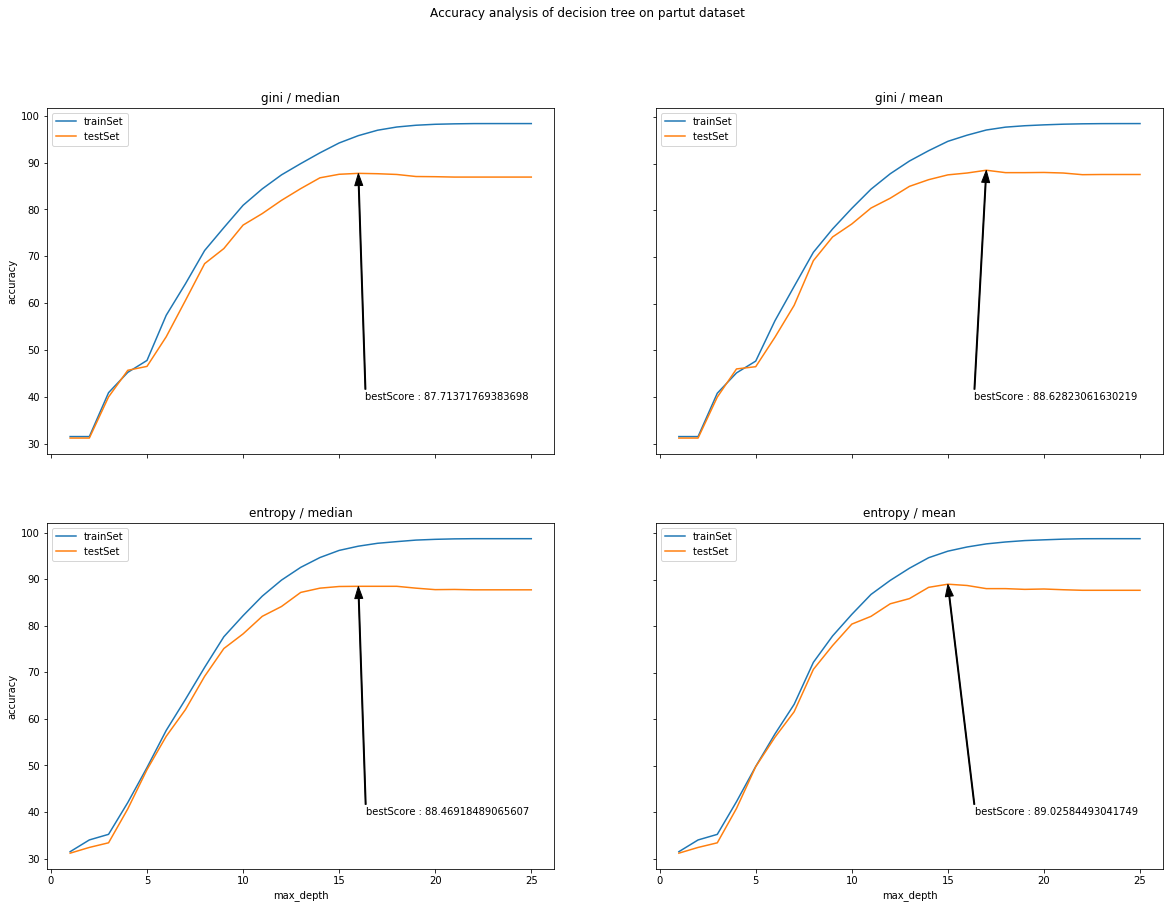

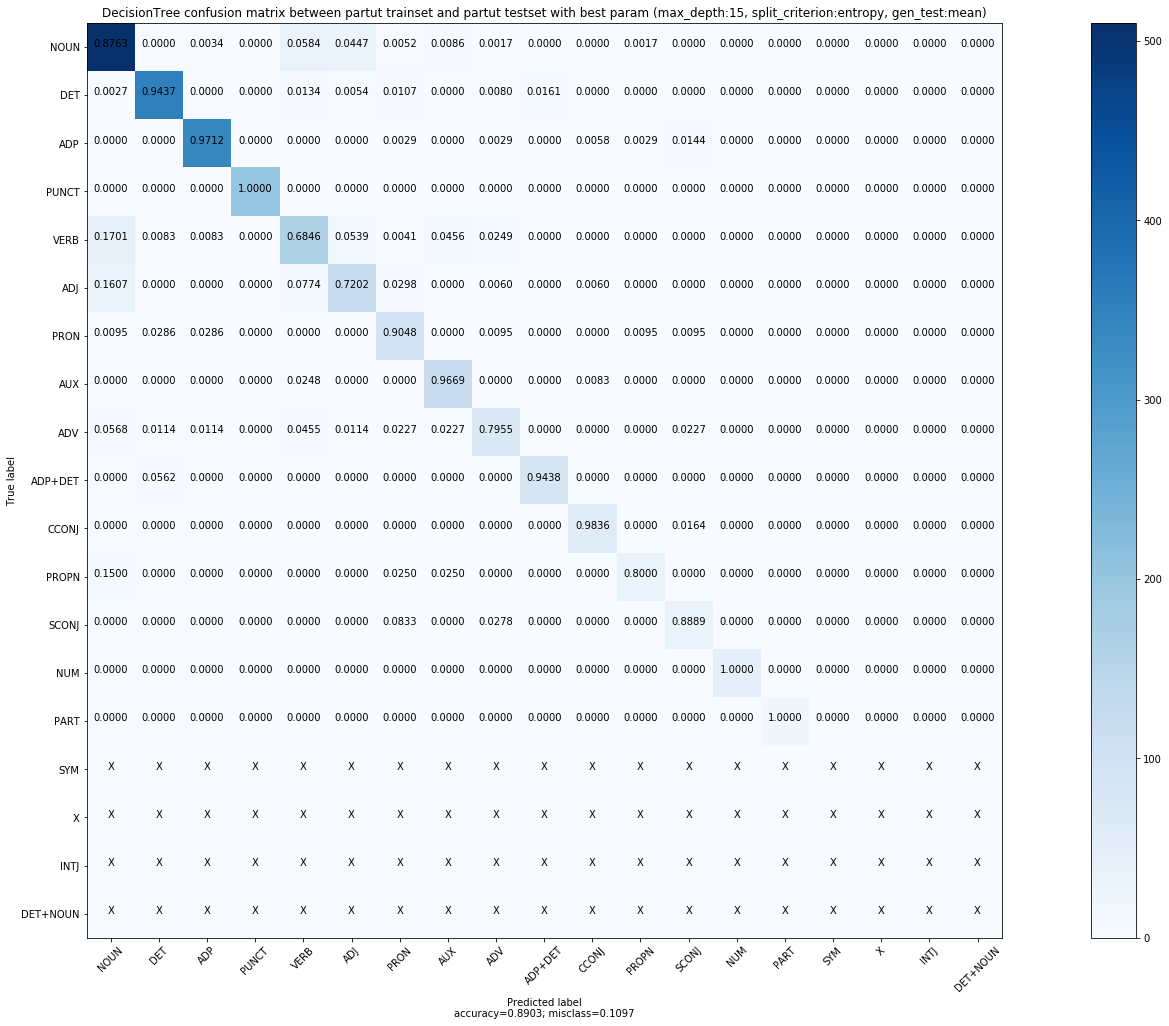

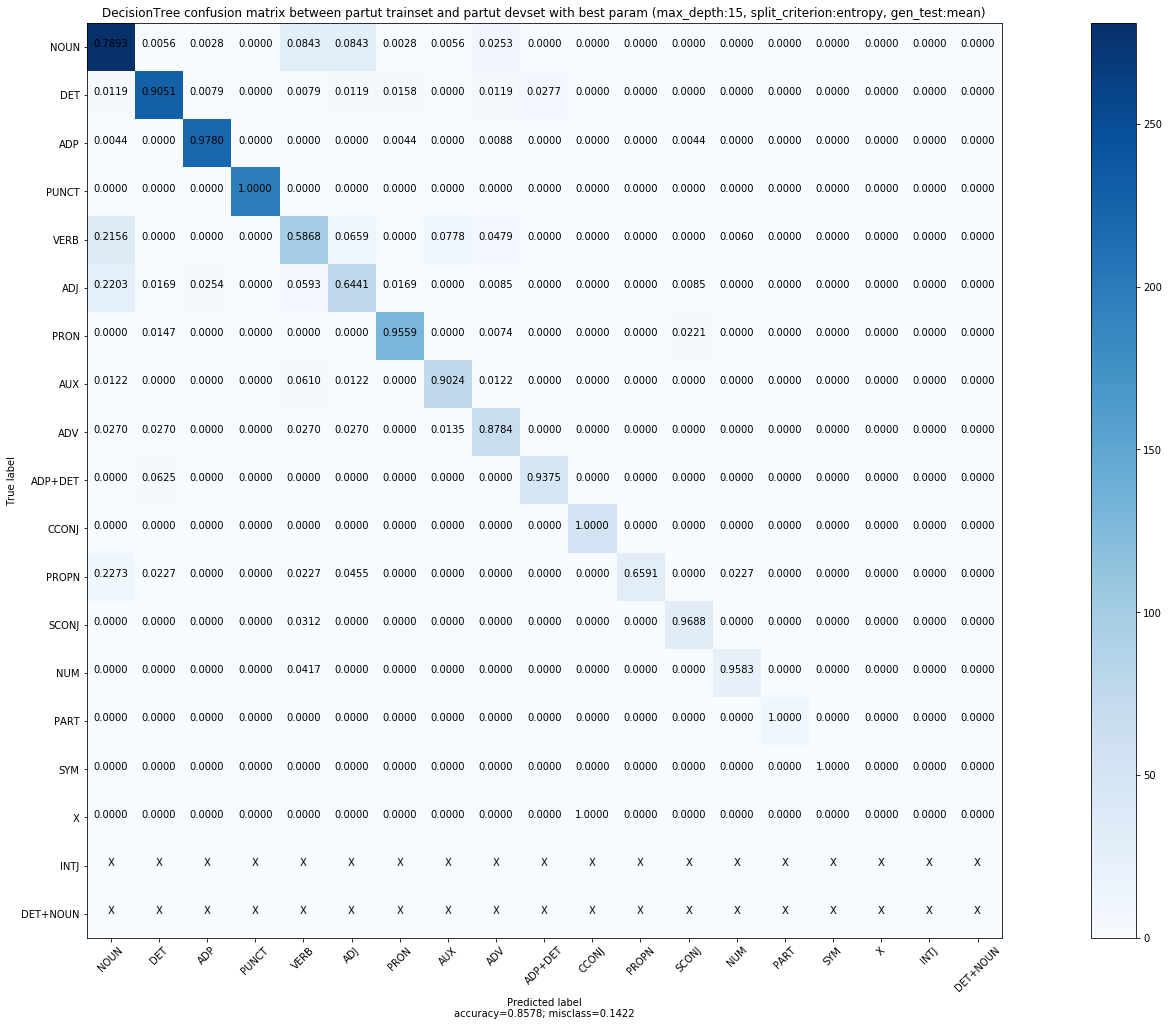

In [3]:
bestTree, bestParam, scoreDev = ma.analyzeDecisionTree("partut", verbose=True)

In [ ]:
for namedataset, _ in da.listeCorpus.items():
    ma.analyzeDecisionTree(namedataset, verbose=True)

In [ ]:
for namedataset, _ in da.listeCorpus.items():
    for test in ["foot", "natdis"]:
        ma.analyzeDecisionTree(namedataset, nameTestSet=test, verbose=True)

In [ ]:
print(bestParam)
print(scoreDev)

In [ ]:
import NaiveBayesClassifier as naivebc

naiveBC = naivebc.NaiveBayesClassifier(Xtrain, Ytrain)

In [ ]:
naiveBC.fit()

In [ ]:
score, cm = naiveBC.modelScore(Xtest, Ytest)

In [ ]:
print(score)

In [ ]:
ma.showConfusionMatrix(cm, decisionTree.classLabel.keys())

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Xtrain, Ytrain = ft.buildFeature(trainSet, lambda x:x)
Xtest, Ytest = ft.buildFeature(testSet, lambda x:x)


clf = MultinomialNB()
clf.fit(trainSet, testSet)

In [ ]:
clf.score(Xtest, Ytest)